In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\Random Forest\glass.csv")

**Data Description:**

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron


Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

2 --building_windows_non_float_processed

3 --vehicle_windows_float_processed

4 --vehicle_windows_non_float_processed (none in this database)

5 --containers

6 --tableware

7 --headlamps

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.shape

(214, 10)

In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
null_counts = data.isnull().sum()
print(null_counts)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


The data has **no missing values.**

In [9]:
# Dividing the variables as categorical and numerical variables:-
cat_list=[]
num_list=[]


for i in data.columns:
    unique_values = len(data[i].unique())
    if unique_values<10:
        cat_list.append(i)
    else:
        num_list.append(i)

In [10]:
print(cat_list)
print('\n',num_list)

['Type']

 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


**Unique values:**

In [11]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

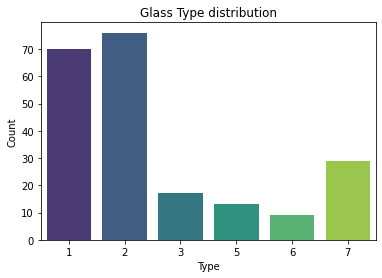

In [12]:
sns.countplot(x="Type", data= data, palette = 'viridis')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Glass Type distribution')

plt.show()

The dataset has maximum number of observations for **glass type 2.**

Whereas **glass type 6** has the least number of observations.

**Outlier analysis:**

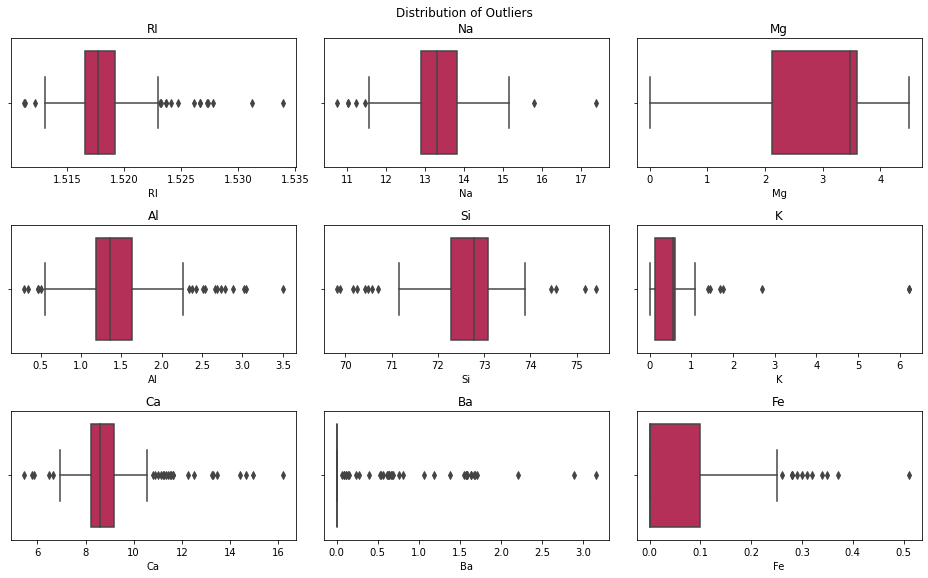

In [13]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'rocket_r')
    plt.title(i)
    plt.tight_layout()
    k+=1

In [14]:
out_list = ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Fe']

In [15]:
# remove outliers;
for i in data.loc[:,out_list]:
    
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    data.loc[data[i]>up_lim,i]=up_lim
    data.loc[data[i]<low_lim,i]=low_lim

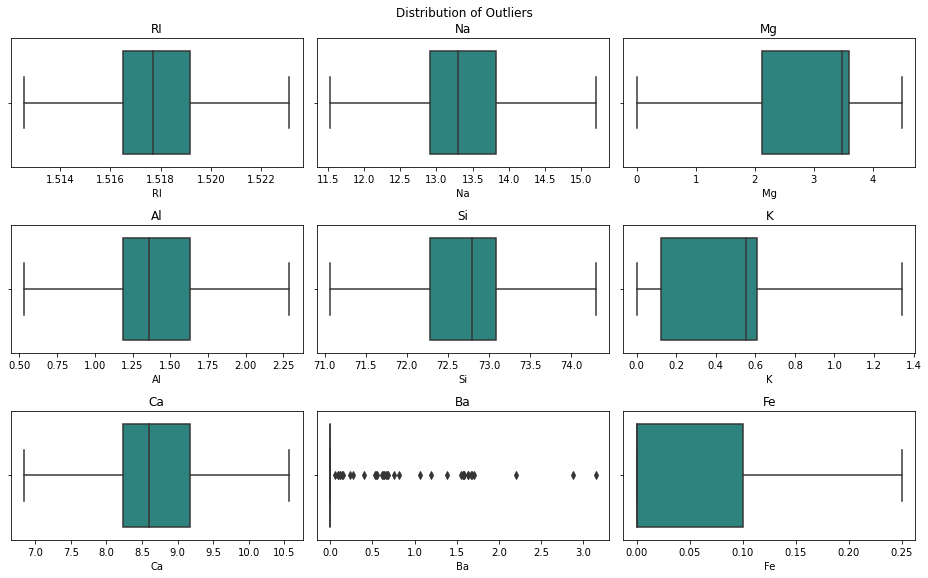

In [16]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'viridis')
    plt.title(i)
    plt.tight_layout()
    k+=1

**Visual Representation:**

Plotting distribution plot for numeric variables:

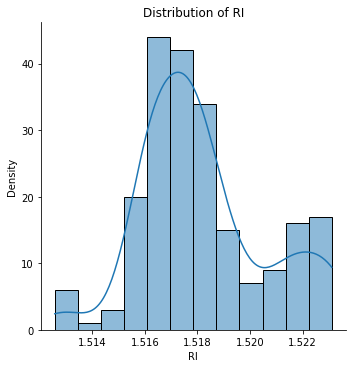

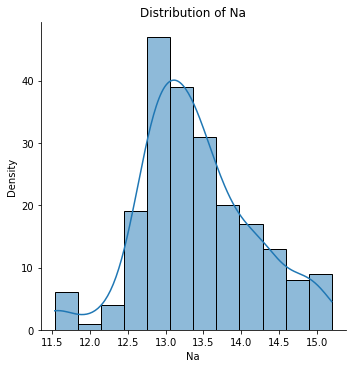

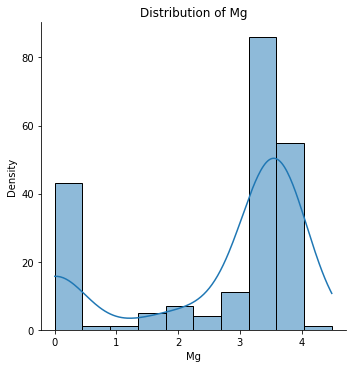

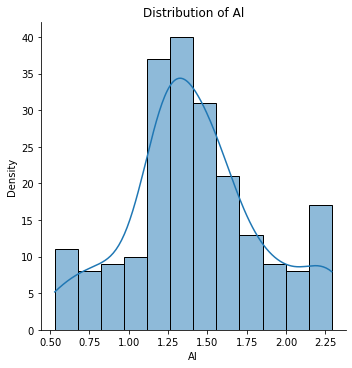

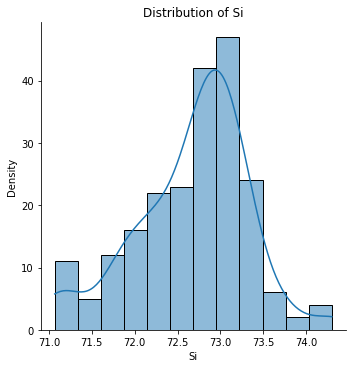

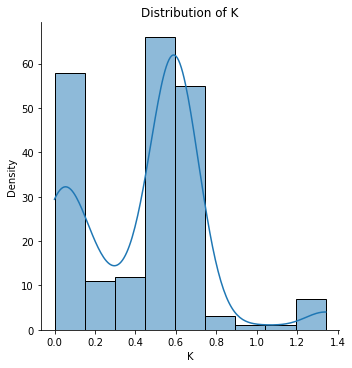

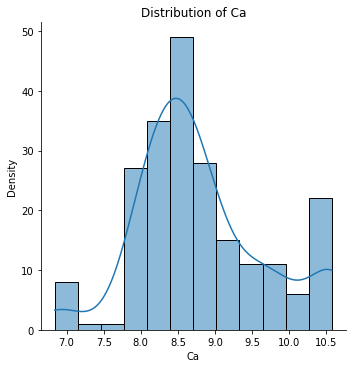

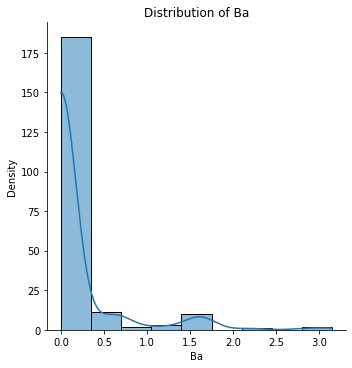

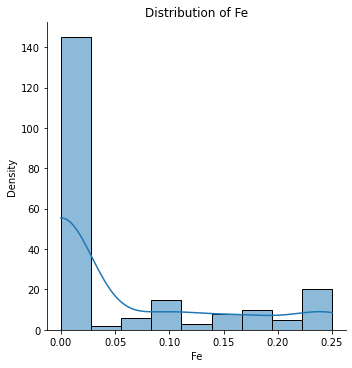

In [17]:
for col in num_list:
    sns.displot(data[col], kde=True, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

Variables RI, Na, Al, Ca have approximate normal distribution.

Variables Ba and Fe are positively skewed whereas variables Si and Mg are negatively skewed.

Violin Plot:

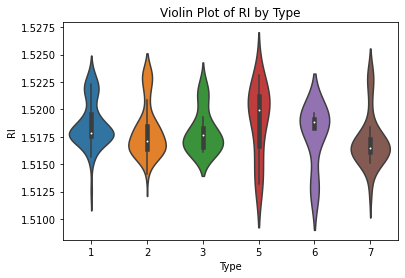

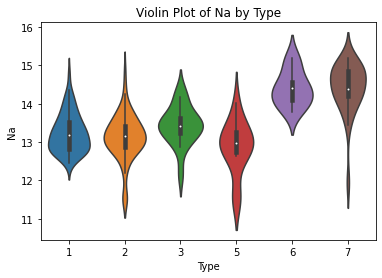

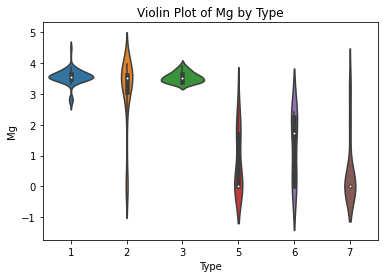

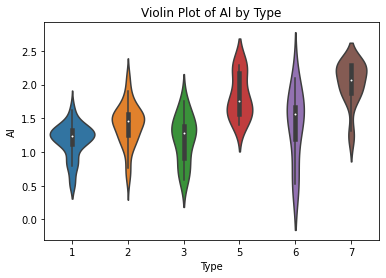

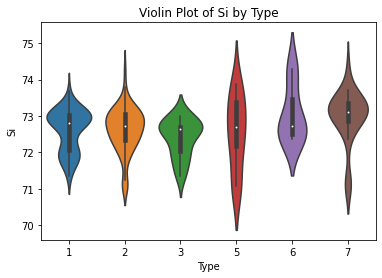

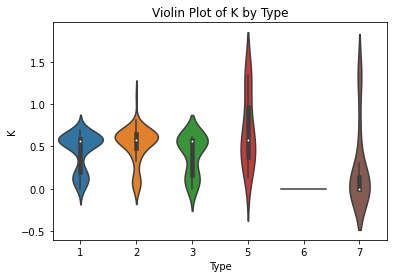

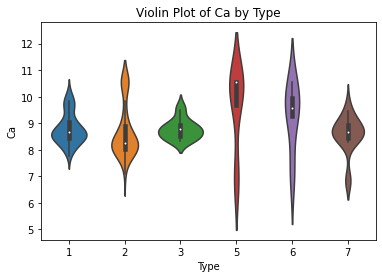

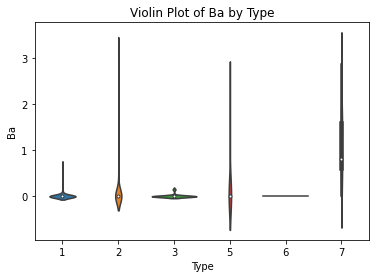

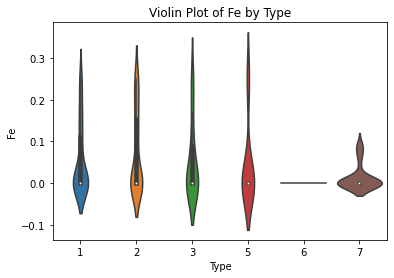

In [18]:
for column in data.columns[:-1]:
    sns.violinplot(x='Type', y=column, data=data)
    plt.title(f'Violin Plot of {column} by Type')
    plt.show()

Scatter Plots:

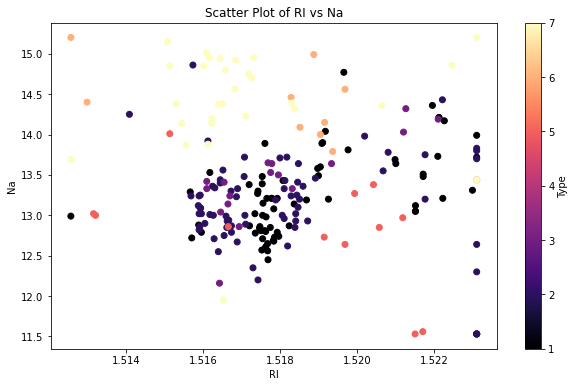

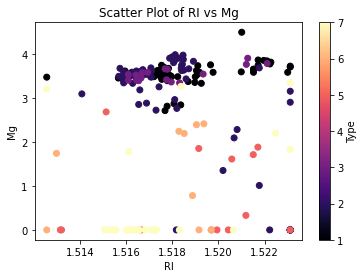

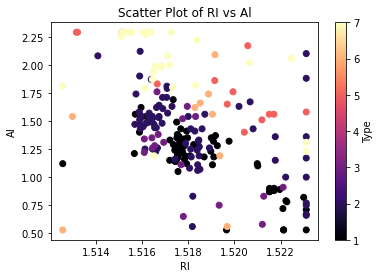

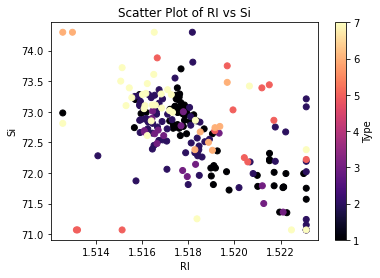

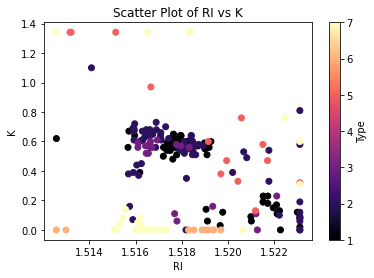

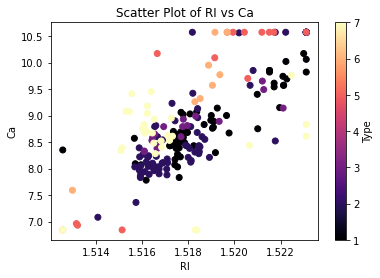

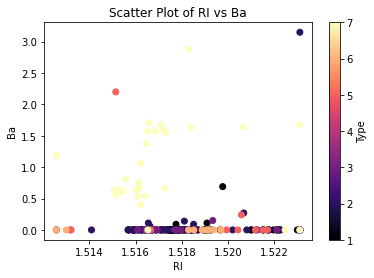

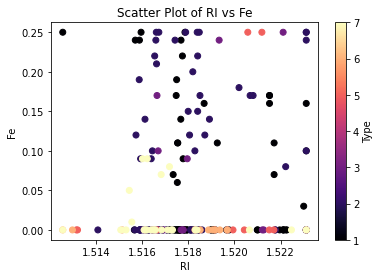

In [19]:
plt.figure(figsize=(10, 6))
for column in data.columns[:-1]:
    if column != 'RI':
        plt.scatter(data['RI'], data[column], c=data['Type'], cmap='magma', label=column)
        plt.xlabel('RI')
        plt.ylabel(column)
        plt.title(f'Scatter Plot of RI vs {column}')
        plt.colorbar(label='Type')
        plt.show()

Heatmap:

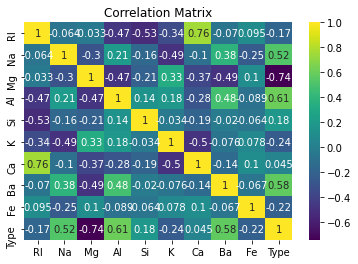

In [20]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')

plt.title('Correlation Matrix')
plt.show()

In [21]:
#sns.pairplot(data)

# Feature Scaling:

In [22]:
x = data.iloc[:,0:9]
y = data['Type']

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [25]:
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

In [26]:
x_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.800759,0.574591,1.000000,0.323864,0.220201,0.044734,0.511729,0.000000,0.0
1,0.478178,0.642711,0.801782,0.471591,0.514319,0.357875,0.265080,0.000000,0.0
2,0.342505,0.544619,0.790646,0.573864,0.594814,0.290774,0.251676,0.000000,0.0
3,0.482922,0.457425,0.821826,0.431818,0.477167,0.424977,0.369638,0.000000,0.0
4,0.460152,0.473774,0.806236,0.403409,0.622678,0.410065,0.329424,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.347249,0.710831,0.000000,1.000000,0.477167,0.059646,0.627011,0.336508,0.0
210,0.406072,0.923365,0.000000,0.829545,0.616486,0.000000,0.417895,0.504762,0.0
211,0.766603,0.770777,0.000000,0.846591,0.727941,0.000000,0.428619,0.520635,0.0
212,0.373814,0.776226,0.000000,0.801136,0.786765,0.000000,0.439343,0.498413,0.0


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# Train-Test Spliting:

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.2,random_state=40) 

# Random Forest classification:

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [32]:
num_trees = 100
max_features = 3

In [33]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=42)

In [34]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [35]:
y_pred = model.predict(x_test)

In [36]:
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7660130718954248


In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [38]:
report = classification_report(y_test, y_pred)

In [39]:
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Cross validation score: {results.mean():.3f}')
print('\nClassification Report:\n', report)

Accuracy: 0.767
Precision: 0.778
Recall: 0.767
F1-score: 0.766
Cross validation score: 0.766

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.85      0.81        13
           2       0.76      0.76      0.76        17
           3       0.50      0.50      0.50         4
           5       0.75      1.00      0.86         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.77        43
   macro avg       0.80      0.73      0.74        43
weighted avg       0.78      0.77      0.77        43



# Bagging and Boosting Methods:

In [40]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

**BAGGING:**

In [41]:
bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)

In [42]:
bagging_clf.fit(x_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [43]:
y_pred_bagging = bagging_clf.predict(x_test)

In [44]:
# Evaluate the performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

In [45]:
print('Bagging Results:')
print(f'Accuracy: {accuracy_bagging:.3f}')
print(f'Precision: {precision_bagging:.3f}')
print(f'Recall: {recall_bagging:.3f}')
print(f'F1-score: {f1_bagging:.3f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_bagging))

Bagging Results:
Accuracy: 0.698
Precision: 0.719
Recall: 0.698
F1-score: 0.697

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.77      0.71        13
           2       0.73      0.65      0.69        17
           3       0.50      0.50      0.50         4
           5       0.60      1.00      0.75         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.70        43
   macro avg       0.75      0.69      0.70        43
weighted avg       0.72      0.70      0.70        43



**BOOSTING:**

In [46]:
boosting_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

In [47]:
boosting_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [48]:
y_pred_boosting = boosting_clf.predict(x_test)

In [49]:
# Evaluate the performance
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

In [50]:
print('Boosting Results:')
print(f'Accuracy: {accuracy_boosting:.3f}')
print(f'Precision: {precision_boosting:.3f}')
print(f'Recall: {recall_boosting:.3f}')
print(f'F1-score: {f1_boosting:.3f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_boosting))

Boosting Results:
Accuracy: 0.488
Precision: 0.443
Recall: 0.488
F1-score: 0.423

Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.92      0.63        13
           2       0.40      0.35      0.38        17
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.25      0.40         4

    accuracy                           0.49        43
   macro avg       0.48      0.42      0.40        43
weighted avg       0.44      0.49      0.42        43



In [51]:
# Preparing a Data frame for final results:
result = pd.DataFrame({
    'Methods': ['Random Forest', 'Bagging', 'Boosting'],
    'Accuracy': [accuracy, accuracy_bagging, accuracy_boosting],
    'Precision': [precision, precision_bagging, precision_boosting],
    'Recall': [recall, recall_bagging, recall_boosting],
    'F1_score': [f1, f1_bagging, f1_boosting]  
})

In [52]:
print('Comparison of Results:')
result

Comparison of Results:


,Methods,Accuracy,Precision,Recall,F1_score
0,Random Forest,0.767442,0.778239,0.767442,0.765719
1,Bagging,0.697674,0.719380,0.697674,0.697328
2,Boosting,0.488372,0.442791,0.488372,0.422919


# CONCLUSION:

**For random forest:**

Random forest method has an overall accuracy of **76.7%**. Thus, Random Forest **performed the best** overall among the three methods.

**For Bagging:**

Bagging showed **slightly lower performance compared to Random Forest**, with reduced accuracy, precision, recall, and F1-score.

**For Boosting:**

Boosting **performed the poorest among the three methods**, showing significantly lower accuracy, precision, recall, and F1-score.

**So we can conclude that:**

1) Random Forest outperformed both Bagging and Boosting in terms of all evaluated metrics.

2) Random Forest is recommended for its balanced performance across multiple metrics, providing a robust classification solution for your dataset.

# Interview questions:

**Q1) Explain Bagging and Boosting methods. How is it different from each other.**

**-- Bagging:**

Bagging trains multiple independent models in parallel on random subsets of the data (bootstrap samples).

It reduces variance and overfitting by averaging predictions.

Example: Random Forest.

**-- Boosting:**

Boosting trains models sequentially, each one correcting errors of its predecessor by focusing on difficult cases.

It improves bias and predictive accuracy.

Examples: AdaBoost, Gradient Boosting Machines (GBM), XGBoost.

**-- Difference:**

Both the methods are different from each other in terms of training approch.

**Bagging** trains models independently and averages predictions. 
Whereas **Boosting** trains models sequentially, adjusting weights based on performance to improve overall accuracy.

**Q2) Explain how to handle imbalance in the data.**

To handle imbalance in a data we can use following techniques:-

**-- Resampling Techniques:**

Over-sampling: Increase minority class examples (e.g., SMOTE).

Under-sampling: Decrease majority class examples.

**-- Algorithmic Techniques:**

Use algorithms robust to class imbalance (e.g., RandomForest, XGBoost).

Adjust class weights in algorithms (e.g., class_weight parameter).

**-- Evaluation Metrics:**

Use metrics like precision, recall, F1-score rather than accuracy.

Consider ROC-AUC for model performance assessment.